# Neural Network with Cubic Data (multi-dimensional)
- y = x^3 -3x^2 -9x -1
- 5 hidden layers

## 1.Import Required Libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
# from visdom import Visdom
# viz = Visdom()

## 2. Data Generation

In [ ]:
num_data = 1000
num_epoch = 5000

x = init.uniform(torch.Tensor(num_data,1),-10,10)
y = (x**3) - 3*(x**2) - 9*x - 1

noise = init.normal(torch.FloatTensor(num_data,1),std=3)

y_noise = y + noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  import sys


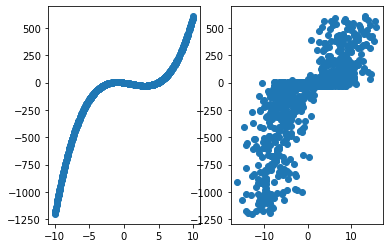

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(x, y)
ax2 = fig.add_subplot(122)
ax2.scatter((x+noise), y)

In [ ]:
# visualize data

input_data = torch.cat([x,y_noise],1)

# win=viz.scatter(
X = input_data,
opts=dict(
    xtickmin=-10,
    xtickmax=10,
    xtickstep=1,
    ytickmin=0,
    ytickmax=500,
    ytickstep=1,
    markersymbol='dot',
    markercolor=np.random.randint(0, 255, num_data),
    markersize=5,
),
# )

In [ ]:
# visualize data

# win=viz.scatter(
X = torch.cat([x,y],1),
opts=dict(
    xtickmin=-10,
    xtickmax=10,
    xtickstep=1,
    ytickmin=0,
    ytickmax=500,
    ytickstep=1,
    markersymbol='dot',
    markercolor=np.random.randint(0, 255, num_data),
    markersize=5,
),
# )

## 3. Model & Optimizer

In [ ]:


model = nn.Sequential(
            nn.Linear(1,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,1),
        )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

## 4. Train 

In [ ]:
loss_arr =[]
label = y_noise

for i in range(num_epoch):
    output = model(x)
    optimizer.zero_grad()

    loss = loss_func(output,label)
    loss.backward()
    
    optimizer.step()
    
    if i % 100 ==0:
        print(loss)
        
    #loss_arr.append(loss.cpu().data.numpy()[0])
    loss_arr.append(loss.item())

tensor(212.1040, grad_fn=<L1LossBackward0>)
tensor(212.0512, grad_fn=<L1LossBackward0>)
tensor(211.9946, grad_fn=<L1LossBackward0>)
tensor(211.9172, grad_fn=<L1LossBackward0>)
tensor(211.8068, grad_fn=<L1LossBackward0>)
tensor(211.6178, grad_fn=<L1LossBackward0>)
tensor(211.2255, grad_fn=<L1LossBackward0>)
tensor(210.1550, grad_fn=<L1LossBackward0>)
tensor(205.2593, grad_fn=<L1LossBackward0>)
tensor(147.3519, grad_fn=<L1LossBackward0>)
tensor(131.1056, grad_fn=<L1LossBackward0>)
tensor(128.3532, grad_fn=<L1LossBackward0>)
tensor(125.2093, grad_fn=<L1LossBackward0>)
tensor(121.1062, grad_fn=<L1LossBackward0>)
tensor(115.0218, grad_fn=<L1LossBackward0>)
tensor(105.1411, grad_fn=<L1LossBackward0>)
tensor(87.1174, grad_fn=<L1LossBackward0>)
tensor(64.9016, grad_fn=<L1LossBackward0>)
tensor(56.8007, grad_fn=<L1LossBackward0>)
tensor(55.7480, grad_fn=<L1LossBackward0>)
tensor(43.1281, grad_fn=<L1LossBackward0>)
tensor(42.0942, grad_fn=<L1LossBackward0>)
tensor(59.2141, grad_fn=<L1LossBackwar

In [ ]:
param_list = list(model.parameters())
print(param_list)



[Parameter containing:
tensor([[-0.5867],
        [-1.3121],
        [-0.1918],
        [-0.2686],
        [-0.6329],
        [ 0.4084],
        [ 0.3192],
        [ 0.1961],
        [-0.5655],
        [ 0.0811],
        [ 0.8633],
        [-0.5817],
        [-1.0530],
        [ 0.3886],
        [-0.6567],
        [ 0.9082],
        [-0.5227],
        [-0.3945],
        [ 0.7149],
        [-0.6837]], requires_grad=True), Parameter containing:
tensor([-1.0621, -5.0254,  0.0116,  1.3490, -4.2845,  0.3744,  0.7525,  0.8722,
        -3.6851,  0.3334, -3.7411, -3.0477, -2.2981,  0.7917, -3.4455, -5.9362,
        -3.1239, -0.6438, -1.9948, -1.3615], requires_grad=True), Parameter containing:
tensor([[ 0.0770,  0.0326,  0.1716,  0.1147, -0.1875,  0.0444,  0.0939, -0.1612,
         -0.0577,  0.0629,  0.0335, -0.0354, -0.0751, -0.2083, -0.1485, -0.1703,
          0.1498,  0.1515,  0.0203, -0.1350],
        [ 0.5228,  1.7524,  0.1650, -0.4592,  2.0797,  0.7609,  0.7498,  0.4140,
          1.6858

## 5. Visualize Trained Output

In [ ]:
# win2=viz.scatter(
X = torch.cat([x, output],1),
opts=dict(
    xtickmin=-10,
    xtickmax=10,
    xtickstep=1,
    ytickmin=0,
    ytickmax=500,
    ytickstep=1,
    markersymbol='dot',
    markercolor=np.random.randint(0, 255, num_data),
    markersize=5,
),
# )



## 6. Visualize Loss Graph

In [ ]:
x = np.reshape([i for i in range(num_epoch)],newshape=[num_epoch,1])
loss_data = np.reshape(loss_arr,newshape=[num_epoch,1])

# win3=viz.line(
#     X = x,
#     Y = loss_data, 
# )